In [1]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tqdm import trange
import matplotlib.pyplot as plt
from random import shuffle
import csv 
import pandas as pd
import numpy as np

filename = 'independent.csv'
independent = pd.read_csv(filename)

filename = 'acres_target.csv'
acres_target = pd.read_csv(filename)

# def readTxt(loc, cols, rel_row=0, delim=",", performLookup=-1):
#     f = open(loc, encoding='utf-8', errors='replace')
#     data = list(csv.reader(f, delimiter=delim))

#     out = []

#     if performLookup > -1:
#         cols = list(map(lambda x: data[performLookup].index(x), cols))

#     for i in range(len(data) - rel_row - 1):
#         temp = []
#         for j in cols:
            
#             temp.append(data[rel_row + i][j])
#         out.append(temp)

#     f.close()

#     return out

#import data

# alldata = readTxt('independent.csv', )

# for x in range(2006, 2014):
#     with open ("./%d.txt" % x, 'r') as f:
#         alldata += json.load(f)
        
# def scope(ln):
#     ln[4] = ln[4] / 10000
#     ln[5] = int(ln[5]) / 10000
#     ln[6] = ln[6] * 100
    
#     ln = ln[0:1] + ln[2:]
    
# #     ln = list(map(lambda x: x*10, ln))
#     return ln

# shuffle(alldata)

# privEnrollment = list(map(lambda x: x[1], alldata))

# alldata = list(map(scope, alldata))


indata = independent.values.tolist()
outdata = acres_target.values.tolist()

# print(indata)



# data = alldata[:-200]
        
# indata = list(map(lambda x:x[0:6], data))

# outdata = list(map(lambda x:x[6:], data))
        
def gen_next_batch():
    pos = 0
    def next_batch(count):
        nonlocal pos
        st = pos
        pos += count
        inpt1 = indata[st:pos]
        outpt1 = outdata[st:pos]
        if pos >= len(indata):
            pos = pos - len(indata)
            inpt1 += indata[:pos]
            outpt1 += outdata[:pos]
        return (inpt1, outpt1)
    return next_batch

next_batch = gen_next_batch()


Instructions for updating:
non-resource variables are not supported in the long term


100%|██████████| 5000/5000 [00:25<00:00, 197.13it/s]


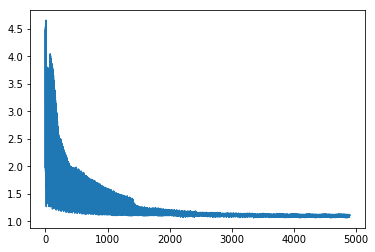

In [2]:
#Create the model
# pubMinorityPercentage, privEnrollmentPercentage, povertyPercentage, eduLvl, CurrentExpenseADA, perCapitalIncome, 
# populationDensity, starAvg


x = tf.placeholder(tf.float32, [None, 11])



# First hidden layer
W1 = tf.get_variable('W_1', 
                    dtype=tf.float32,
                    shape=[11,20],
                    initializer=tf.truncated_normal_initializer(stddev=2))
b1 = tf.Variable(tf.zeros([20]))
y1 = tf.nn.elu(tf.matmul(x, W1)) + b1

# # Second hidden layer
# W2 = tf.get_variable('W_2', 
#                     dtype=tf.float32,
#                     shape=[20, 10],
#                     initializer=tf.truncated_normal_initializer(stddev=1))
# b2 = tf.Variable(tf.zeros([10]))
# y2 = tf.nn.relu(tf.matmul(y1, W2)) + b2

# # Third hidden layer
# W3 = tf.get_variable('W_3', 
#                     dtype=tf.float32,
#                     shape=[10, 10],
#                     initializer=tf.truncated_normal_initializer(stddev=1))
# b3 = tf.Variable(tf.zeros([10]))
# y3 = tf.nn.relu(tf.matmul(y2, W3)) + b3

# W = tf.Variable(tf.zeros([10, 1]))
W = tf.get_variable('W', 
                    dtype=tf.float32,
                    shape=[20, 1],
                    initializer=tf.truncated_normal_initializer(stddev=1))
b = tf.Variable(tf.zeros([1]))
y = tf.matmul(y1, W) + b

y_ = tf.placeholder(tf.float32, [None, 1])

#cross_entropy = -tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y)
cross_entropy = tf.reduce_mean(tf.keras.losses.logcosh(y_, y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

#Create a session object, initialise all variables
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# sess.run(tf.print(W1))
loss_list = []
for _ in trange(5000):
    batch_xs, batch_ys = next_batch(1400)
#     batch_xs = indata
#     batch_ys = outdata
    feed_dict={x: batch_xs, y_: np.log(np.add(batch_ys, 1))}
    sess.run(train_step, feed_dict)
    loss_list.append(sess.run(cross_entropy, feed_dict))
    
plt.plot(loss_list[100:])

#Define labels placeholder
    
    

In [58]:
# batch_xs, batch_ys = next_batch(1)
feed_dict={x: batch_xs, y_: np.log(np.add(batch_ys, 1))}
sess.run(tf.nn.elu([1,-1,-10]), feed_dict)
# sess.run(W1)

TypeError: Value passed to parameter 'features' has DataType int32 not in list of allowed values: float16, bfloat16, float32, float64

In [4]:
import numpy as np
from numpy.polynomial.polynomial import polyfit

def polyfit(x, y, degree):
#     results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
#     results['polynomial'] = coeffs

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results = ssreg / sstot

    return results

testdata = alldata[-1000:]

privEnrollmentplot = privEnrollment[-1000:]

# testdata = alldata[:200]
yaxis = []
xaxis = []

for i in range(len(testdata)):
    val = testdata[i]
    yaxis.append(sess.run(y, feed_dict={x:[val[0:6]], y_:[val[6:]]})[0][0])
    xaxis.append(privEnrollmentplot[i])
    

fit = polyfit(xaxis, yaxis, 2)

# xaxis = list(map(lambda x: x[6], testdata))

fig, ax = plt.subplots()#figsize=(8,8))

lbf, = ax.plot(np.unique(xaxis), np.poly1d(np.polyfit(xaxis, yaxis, 2))(np.unique(xaxis)), color='red')


ax.scatter(xaxis, yaxis)

# idt, = ax.plot((-2, 3.5), (-2, 3.5), color="red")

lbf.set_label('Order 2 polynomial trendline, r^2=%1.3f' % (fit))

ax.legend()

plt.title('Residue against Private School Enrollment Rate')
    
plt.ylabel('Residue')
    
plt.xlabel('Priv Enrollment Rate')

plt.savefig('accuracy.png', dpi=300)

# Setting things up hypothesis paper read

# model developed what did we do? pridictive performance ok

# this plot (residue) (why makes sense this resedule vs predict)


NameError: name 'alldata' is not defined

In [ ]:
testdata = alldata[-200:]

# testdata = alldata[:200]
yaxis = []

for i in testdata:
    yaxis.append(i[6] - sess.run(y, feed_dict={x:[i[0:6]], y_:[i[6:]]}))
    xaxis.append()
    
xaxis = list(map(lambda x: x[6], testdata))

fig, ax = plt.subplots()#figsize=(8,8))

ax.scatter(xaxis, yaxis)

idt, = ax.plot((-2, 3.5), (-2, 3.5), color="red")

idt.set_label('Idenity')

ax.legend()

plt.title('Predicted vs. Actual STD Relative to State CST Mean')
    
plt.ylabel('Predicted # of of STD Relative\n to State CST Mean')
    
plt.xlabel('Actual # of STD Relative to State CST Mean')

plt.savefig('accuracy.png', dpi=300)


In [ ]:
mse = sum(map(lambda x, y: (x - y)**2,xaxis, yaxis)) / len(xaxis)
# mean absolute error


L1e = sum(map(lambda x, y: abs(x - y),xaxis, yaxis)) / len(xaxis)


# yaxis = [1,2,3]
# xaxis = [2,2,2]

mean = sum(xaxis) / len(xaxis)
r2 = 1 - sum(map(lambda x, y: (x - y)**2,xaxis, yaxis)) / sum(map(lambda y: (y - mean)**2, yaxis))
print(L1e, mse, r2)



In [ ]:
shuffle(testdata)

st = 0
fi = 1

steps = 100

howmany = 10

y_axis = []
x_axis = range(steps)
for j in range(howmany):
    distValue = testdata[j][0:6].copy()
    one_district = []
    for i in range(steps):
        currVal= st + (fi - st) / steps * i
        distValue[1] = currVal
        one_district.append(sess.run(y, {x: [distValue]})[0][0])
    y_axis.append(one_district)

y_axis = list(map(list, zip(*y_axis)))
    
plt.title('Graph of Predicted CST Performance in Public Schools\nagainst Percentage of Private School Enrollment')
    
plt.ylabel('Predicted # of STD relative to State CST Score Mean')
    
x_axis = list(map(lambda x: x/steps*100, x_axis))

plt.xlabel('Percentage of Private School Enrollment (%)')
plt.plot(x_axis, y_axis)

plt.savefig('result.png', dpi=300)



In [ ]:
batch_xs, batch_ys = next_batch(1)
print(sess.run(cross_entropy, feed_dict={x: batch_xs, y_: batch_ys}))
print(sess.run(y, feed_dict={x: batch_xs, y_: batch_ys}))
print(batch_ys)
# sess.run(tf.print(W))

# sess.run(tf.print(W1))

# plot vs resdue

# new model and vs 


In [ ]:
_W = sess.run(W1)

In [ ]:
print(_W)